In [4]:
using Plots
using LightGraphs, MetaGraphs, GraphPlot
using JLD
using StatsBase 
using ProgressMeter

In [10]:
using Roots
using ForwardDiff

# Writing BFS and GFS routines 

We use the beautiful `LightGraphs` and `MetaGraphs` packages to do this! Our benchmark graph will be the following Clique Graph: 

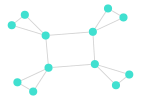

In [55]:
mg = MetaGraph(CliqueGraph(3,4)); 
gplot(mg)

And the `GraphTraversals` module holds the algorithms! Make sure that the `GraphTraversals.jl` file is in the same directory as this notebook. Run the following code and you'll be good to go. 

In [117]:
include("./GraphTraversals.jl")
using .GraphTraversals

# Verifying the Erdos-Renyi Results

Once again, `LightGraphs` is the way to go! 

In [105]:
z = LinRange(0.04,4.0,100); #Make a 100 values of z! 
n = 1000

1000

In [116]:
S_z = []; 
s_z = [];

for i in 1:100
    #print("\rWhat am I even doing?")
    S_trials = []; 
    s_trials = [];  
    print("\nRunning p = ", z[i]/(n-1),"...")
    for j in 1:10
        G = MetaGraph(erdos_renyi(n,z[i]/(n-1))); 
        DFSTree = GraphTraversals.my_dfs(G); 
        sizes = get_prop(DFSTree, :cc_sizes);
        S_trials = push!(S_trials, maximum(sizes)/n); 
        s_trials = push!(s_trials, mean(deleteat!(sizes, findall(sizes .== maximum(sizes)))));     
    end
    
    S_z = push!(S_z, mean(S_trials));
    s_z = push!(s_z, mean(s_trials)); 
    
end


Running p = 4.004004004004004e-5...
Running p = 8.008008008008009e-5...
Running p = 0.00012012012012012013...
Running p = 0.00016016016016016016...
Running p = 0.0002002002002002002...
Running p = 0.00024024024024024023...
Running p = 0.0002802802802802803...
Running p = 0.0003203203203203203...
Running p = 0.0003603603603603604...
Running p = 0.0004004004004004004...
Running p = 0.0004404404404404404...
Running p = 0.00048048048048048047...
Running p = 0.0005205205205205206...
Running p = 0.0005605605605605606...
Running p = 0.0006006006006006006...
Running p = 0.0006406406406406406...
Running p = 0.0006806806806806807...
Running p = 0.0007207207207207207...
Running p = 0.0007607607607607608...
Running p = 0.0008008008008008007...
Running p = 0.0008408408408408408...
Running p = 0.0008808808808808808...
Running p = 0.0009209209209209209...
Running p = 0.0009609609609609609...
Running p = 0.001001001001001001...
Running p = 0.0010410410410410412...
Running p = 0.001081081081081081...


In [13]:
F1 = plot(z, S_z, 
     markershape = :circle, 
     xlabel = "z",
     gridalpha = 0.0, 
     markersize = 5.0, 
     tickfontsize = 12,
     #ylabel = "Experimental",
     label = "S(z): Experimental",
     legend = :bottomright,
     legendfontsize = 12.0,
     markerstrokewidth = 0)
plot!(ones(100,1), LinRange(0,1,100), 
      linestyle = :dash,
      label = "z=1",
      linewidth = 2.0)
plot!(z, S_thr, 
     ylabel = "Theoretical",
     markershape = :circle,
     markersize = 5.0,
     markerstrokewidth = 0,
     #label = "S(z): Theoretical",
     markeralpha = 0.5)
savefig("Fig1")

In [11]:
D(f) = x -> ForwardDiff.derivative(f,float(x)); 
S_thr = [];

for i in z 
    f(x) = 1 - x - exp(-i*x); 
    S_thr = push!(S_thr, find_zero((f,D(f)), 1, Roots.Newton()));
end

In [14]:
s_thr = 1 ./(1 .- z .+ z.*S_thr);

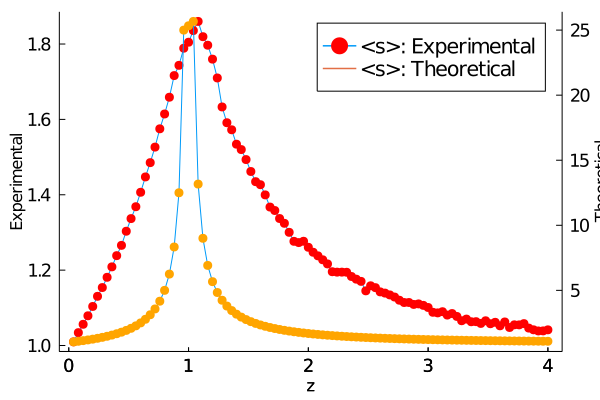

In [31]:
using Plots.PlotMeasures

s_thr[25] = s_thr[24]/2 + s_thr[26]/2;
plot(z, s_z, 
     markershape = :circle, 
     xlabel = "z",
     gridalpha = 0.0, 
     markersize = 5.0, 
     tickfontsize = 12,
     ylabel = "Experimental",
     label = "<s>: Experimental",
     legend = :topright,
     legendfontsize = 12.0,
     markercolor = :red,
     markerstrokewidth = 0)
plot!(z, NaN*z, label = "<s>: Theoretical")
plot!(twinx(), z, s_thr,
     rightmargin = 30mm,
     markershape = :circle, 
     ylabel = "Theoretical",
     xlabel = "z",
     gridalpha = 0.0, 
     markersize = 5.0, 
     tickfontsize = 12,
     label = false,
     legend = :topleft,
     legendfontsize = 12.0,
     markercolor = :orange,
     markerstrokewidth = 0)
#savefig("Fig2")

In [140]:
z = 4; 
p = [10 11 12 13];
n = 2 .^p;
l = []; 
samples = Array{Float64,2}(undef, 100,4); 
iter = 0;
for i in 1:4
    draws = sample(1:n[i], 100, replace = false); 
    
    @showprogress for j in 1:100
        G = MetaGraph(erdos_renyi(n[i],z/(n[i]-1)));
        BFSTree = GraphTraversals.my_bfs(G,draws[j]); 
        paths = GraphTraversals.getatts(BFSTree, "dist");
        samples[j,i] = mean(paths);  
    end
    l = push!(l, mean(samples[:,i])); 
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


In [22]:
l = [];
for i in 1:4
    l = push!(l, mean(samples[:,i]));
end

In [25]:
p = [10,11,12,13]
errors = []
for i in 1:4 
    errors = push!(errors, maximum(samples[:,i])-minimum(samples[:,i]));
end

plot(p,l.*2, 
     markershape=:circle,
     markersize=10.0,
     tickfontsize = 12.0, 
     gridalpha = 0.0,
     xlabel = "log₂(n)",
     yerror = errors,
     #markerstrokewidth = 0.0,
     label = "l(n) x log₂(z)")
plot!(p, p, markershape=:circle,
     markersize=10.0,
     markercolor = :red,
     label = "log₂(n))",
     markeralpha = 0.4)
#savefig("lvlogn_logz")